In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [5]:
df = pd.read_csv("cardiotocographic.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (2126, 14)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [6]:
# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [7]:
# Data types
print("\nData Types:\n", df.dtypes)


Data Types:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [28]:
# Convert all columns to numeric if needed
df = df.apply(pd.to_numeric, errors='coerce')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [9]:
 #Drop rows with missing values
df = df.dropna()

In [10]:
# Detect and remove outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


In [11]:
# Outlier-free data
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nCleaned Dataset Shape:", df_clean.shape)



Cleaned Dataset Shape: (885, 14)


In [12]:
summary = df_clean.describe().T
summary['median'] = df_clean.median()
summary['IQR'] = summary['75%'] - summary['25%']

print("\nStatistical Summary:\n")
summary



Statistical Summary:



,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,885.0,131.846366,9.453055,106.000000,125.000000,133.000000,138.000000,160.000000,133.000000,13.000000
AC,885.0,0.004094,0.003752,-0.000122,0.000000,0.003358,0.006747,0.014068,0.003358,0.006747
FM,885.0,0.000602,0.001335,-0.002467,0.000000,0.000000,0.000310,0.006272,0.000000,0.000310
UC,885.0,0.004956,0.002717,-0.000101,0.003109,0.005051,0.006928,0.012072,0.005051,0.003820
DL,885.0,0.001542,0.002216,-0.000124,0.000000,0.000000,0.003082,0.008197,0.000000,0.003082
DS,885.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,885.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,885.0,42.389054,15.079700,15.000000,29.000000,41.000000,56.000000,79.000000,41.000000,27.000000
MSTV,885.0,1.271093,0.538078,0.300000,0.900000,1.200000,1.600000,3.200000,1.200000,0.700000
ALTV,885.0,3.162907,6.031257,-1.043619,0.000000,0.000000,4.000000,27.000000,0.000000,4.000000


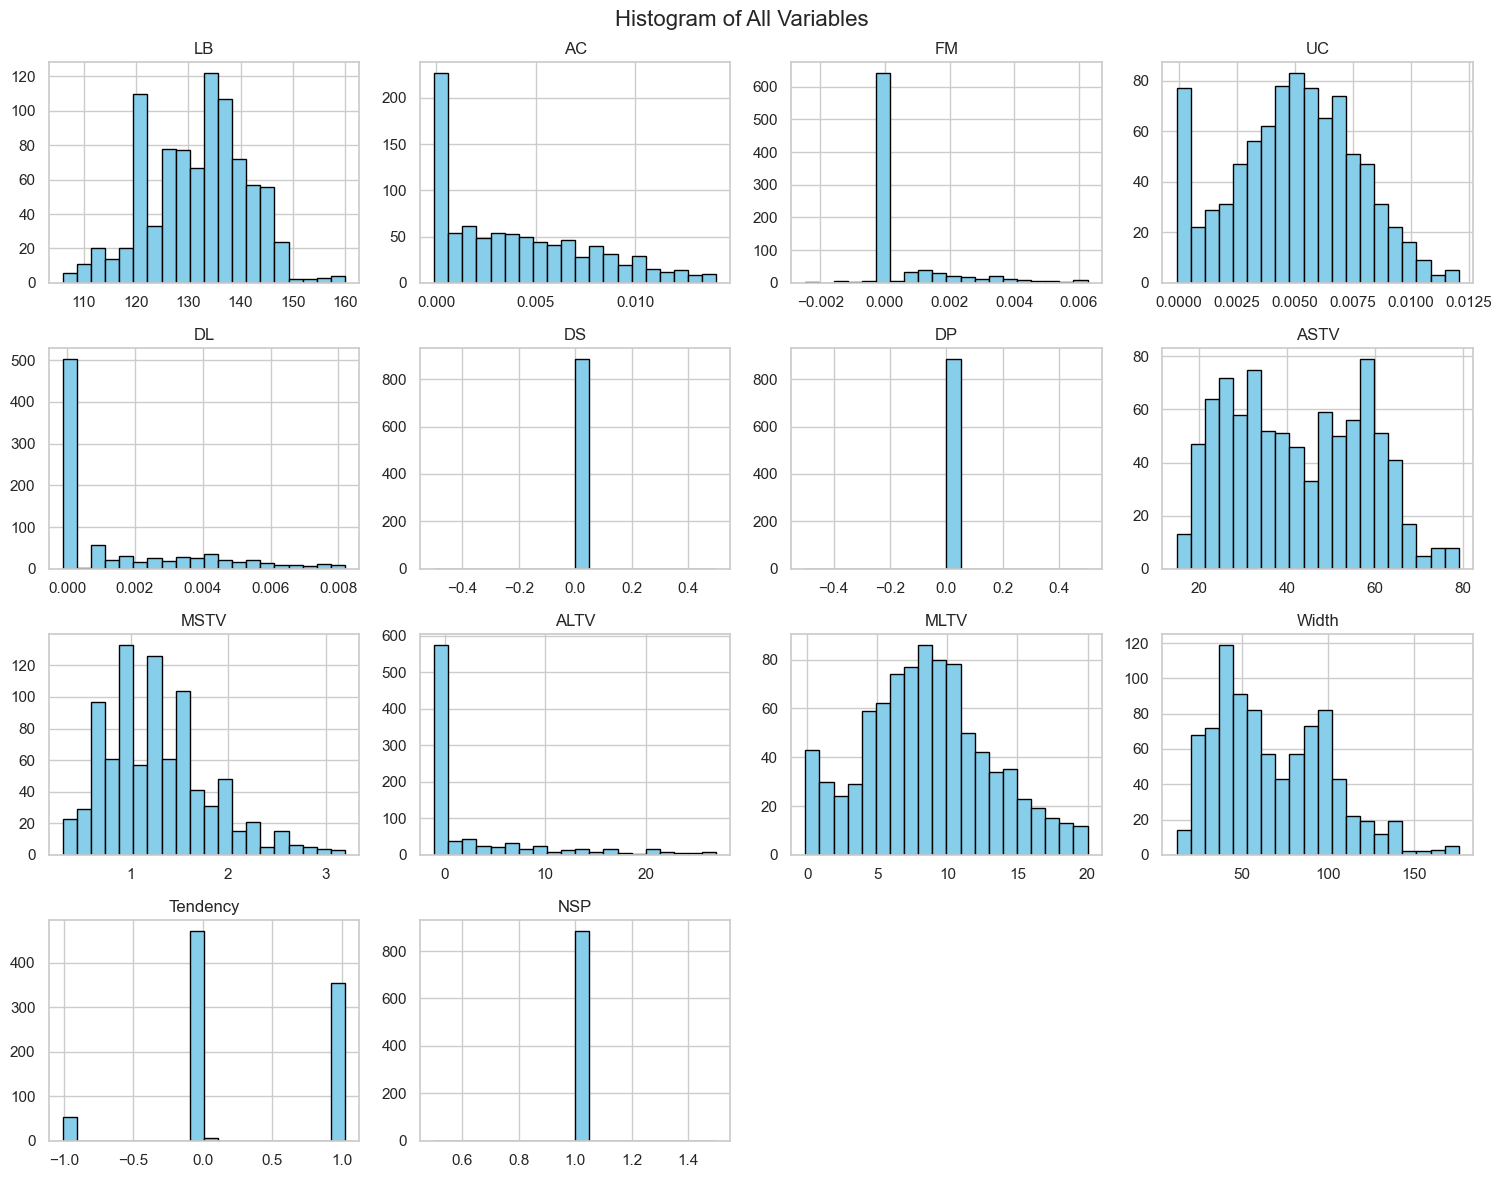

In [13]:
df_clean.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histogram of All Variables", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\indira\AppData\Local\Temp\ipykernel_21484\2088627208.py:6: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


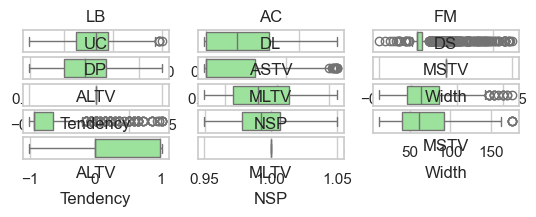

In [29]:
for i, col in enumerate(df_clean.columns):
    plt.subplot(,3, i + 1)
    sns.boxplot(data=df_clean, x=col, color='lightgreen')
    plt.title(col, fontsize=12)

plt.tight_layout()
plt.show()

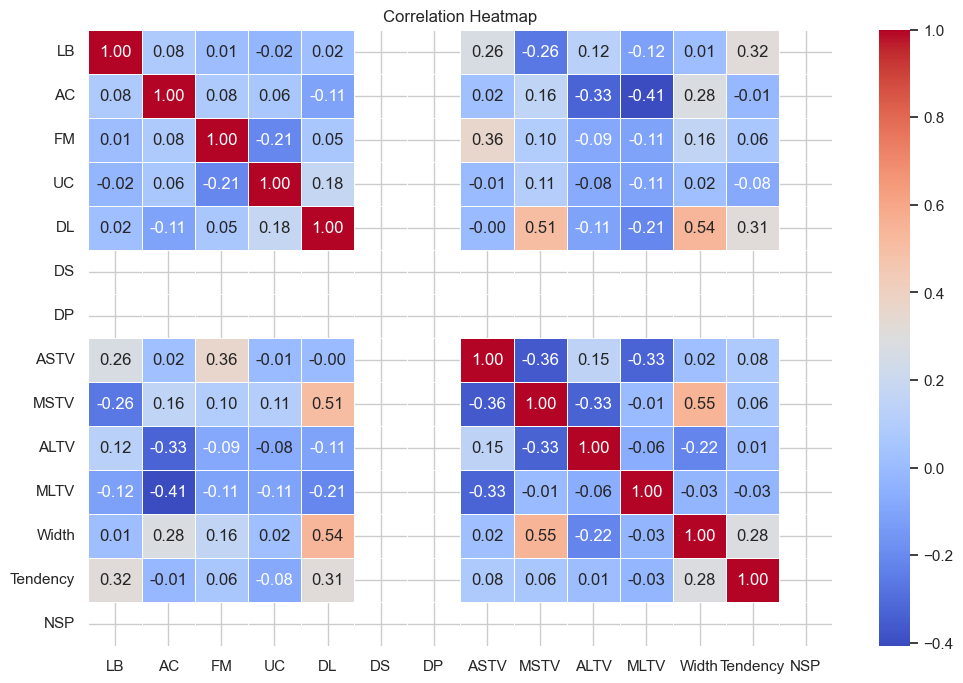

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


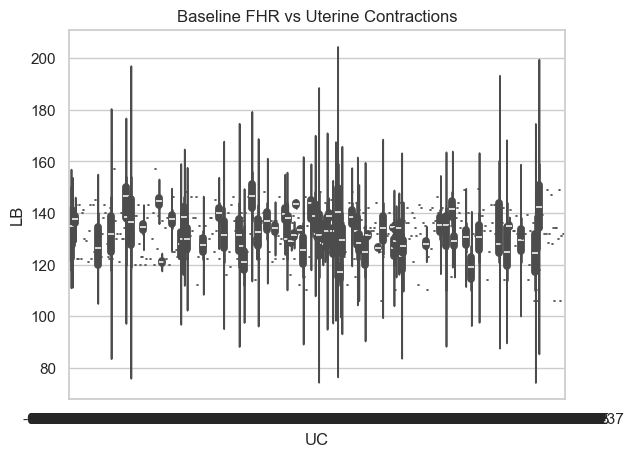

In [21]:
sns.violinplot(data=df_clean, x='UC', y='LB')
plt.title("Baseline FHR vs Uterine Contractions")
plt.show()


In [18]:
# Display strong correlations (above 0.6 or below -0.6)
corr_matrix = df_clean.corr()
strong_corrs = corr_matrix[(corr_matrix > 0.6) | (corr_matrix < -0.6)]
print("\nStrong Correlations (>|0.6|):\n")
strong_corrs



Strong Correlations (>|0.6|):



,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FM,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UC,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DL,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
MSTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
ALTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [20]:
# a strong correlation blw uc(uterine contractions nad dl(late declerations)
#outerliers are found in some cases can be found using box plot
#can find patterns blw columns using violin and pair plots

## recommendations

In [ ]:
#classification model can be developed
#can be use different methods to find the best accuracy,precision and parameters to reduce correlations and outliers